In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import cv2
import numpy as np


im_size = 224


masks = dict()
def get_masks(x_size, y_size):
    green_mask = np.zeros(x_size * y_size, dtype=np.uint8).reshape(x_size, y_size)
    blue_mask = np.zeros(x_size * y_size, dtype=np.uint8).reshape(x_size, y_size)
    red_mask = np.zeros(x_size * y_size, dtype=np.uint8).reshape(x_size, y_size)
    
    if (x_size, y_size) in masks:
        return masks[(x_size, y_size)]
    
    for i in range(x_size):
        for j in range(y_size):
            if i % 2 == 0 and j % 2 == 1:
                red_mask[i][j] = 1
            elif i % 2 == 1 and j % 2 == 0:
                blue_mask[i][j] = 1
            else:
                green_mask[i][j] = 1
    masks[(x_size, y_size)] = green_mask, blue_mask, red_mask
    return green_mask, blue_mask, red_mask
            
            
def get_bayer_image(source):
    green_mask, blue_mask, red_mask = get_masks(source.shape[0], source.shape[1])
    bayer_image = np.zeros(source.shape, dtype=np.uint8)
    bayer_image[:, :, 0] = source[:, :, 0] * blue_mask
    bayer_image[:, :, 1] = source[:, :, 1] * green_mask
    bayer_image[:, :, 2] = source[:, :, 2] * red_mask
    return bayer_image


def gen_sample(image_path):
    source = cv2.imread(image_path)
    images = []
    bayer_images = []
    big_bayer_images = []

    for i in range(source.shape[0] % im_size, source.shape[0], im_size):
        for j in range(source.shape[1] % im_size, source.shape[1], im_size):
            images.append(source[i:i + im_size, j:j + im_size,:])
            bayer_image = get_bayer_image(images[-1])
            big_bayer_images.append(bayer_image)
            bayer_images.append(np.sum(bayer_image, axis=2).reshape(im_size, im_size, 1))
    
    return images, bayer_images, big_bayer_images

In [3]:
images_path = r'/home/egiby/Learning/Current/cv/image_processing/hw1/Train/'

images, bayer_images, big_bayer_images = [], [], []

for path in os.listdir(images_path):
    if path[0] != '.':
        new_images, new_bayer_images, new_big_bayer = gen_sample(os.path.join(images_path, path))
        images.extend(new_images)
        bayer_images.extend(new_bayer_images)
        big_bayer_images.extend(new_big_bayer)

In [4]:
len(images)

11113

In [5]:
import pickle

pickle.dump(images, open('./data/sample224.real', 'wb'))
pickle.dump(bayer_images, open('./data/sample224.bayer', 'wb'))
pickle.dump(big_bayer_images, open('./data/sample224.bgrbayer', 'wb'))

In [6]:
img = images[5555]
bayer_img = bayer_images[5555]
big_bayer_img = big_bayer_images[5555]

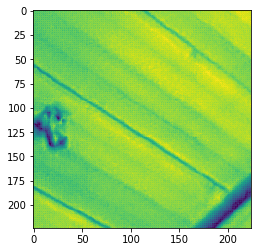

In [7]:
plt.imshow(bayer_img[:, :, 0])

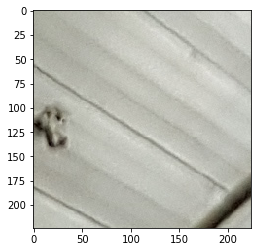

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

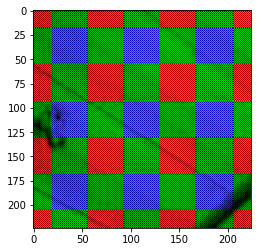

In [9]:
plt.imshow(cv2.cvtColor(big_bayer_img, cv2.COLOR_BGR2RGB))